## define the function

In [1]:
# let's get some 1 minute bar data using alphavantage.co
# register for an APIKEY at alphavantage.co
# NOTE: you must set outputsize = full in your url otherwise you get truncated data
# SOURCE: https://www.alphavantage.co/

import pandas as pd
import io
import requests

# TODO: replace with your own API key
apikey = "G9X6PNM9DW17K47X"

# get daily stock prices
def getDailyStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(columns = ['timestamp'])
    return symbol_df

# get minute stock prices
def getMinuteStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&interval=1min&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(['timestamp'], axis= 1)
    return symbol_df

# get minute stock prices
def getLatestStockPrice(symbol):
    url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=' + symbol + '&apikey=' + apikey + '&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return symbol_df['price'].values[0]


## download data of stock

In [2]:
symbol = 'MSFT'
history_data_MSFT_1min = getMinuteStockPrices(symbol)
print(type(history_data_MSFT_1min))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(history_data_MSFT_1min.iloc[0,])

open         116.07
high         116.43
low          116.05
close        116.43
volume    662475.00
Name: 2019-03-18 09:31:00, dtype: float64


## data processing

In [4]:
chart_date = '2019-03-18'
history_data_MSFT_1min_open = pd.Series(history_data_MSFT_1min['open'], index=history_data_MSFT_1min.index)
history_data_MSFT_1min_high = pd.Series(history_data_MSFT_1min['high'], index=history_data_MSFT_1min.index)
history_data_MSFT_1min_low = pd.Series(history_data_MSFT_1min['low'], index=history_data_MSFT_1min.index)
history_data_MSFT_1min_close = pd.Series(history_data_MSFT_1min['close'], index=history_data_MSFT_1min.index)
history_data_MSFT_1min_volume = pd.Series(history_data_MSFT_1min['volume'], index=history_data_MSFT_1min.index)
history_data_MSFT_1min_open.rename = 'open'
history_data_MSFT_1min_high.rename = 'high'
history_data_MSFT_1min_low.rename = 'low'
history_data_MSFT_1min_close.rename = 'close'
history_data_MSFT_1min_volume.rename = 'volume'
history_data_MSFT_1min_open_chart_date = history_data_MSFT_1min_open[chart_date]
history_data_MSFT_1min_high_chart_date = history_data_MSFT_1min_high[chart_date]
history_data_MSFT_1min_low_chart_date = history_data_MSFT_1min_low[chart_date]
history_data_MSFT_1min_close_chart_date = history_data_MSFT_1min_close[chart_date]
history_data_MSFT_1min_volume_chart_date = history_data_MSFT_1min_volume[chart_date]

## draw picture of price and volume of the stock

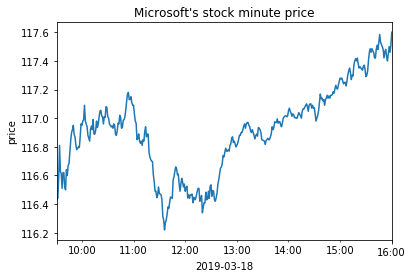

In [90]:
import matplotlib.pyplot as plt
history_data_MSFT_1min_close_chart_date.plot(kind='line')
plt.ylabel('price')
plt.xlabel(chart_date)
plt.title("Microsoft's stock minute price")
plt.show()

In [76]:
history_data_MSFT_1min_volume_chart_date.head(3)

timestamp
2019-03-18 09:31:00    662475
2019-03-18 09:32:00    112071
2019-03-18 09:33:00    151951
Name: volume, dtype: int64

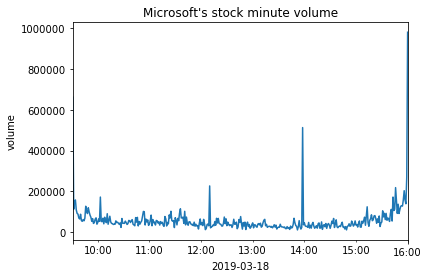

In [91]:
history_data_MSFT_1min_volume_chart_date.plot(kind='line')
plt.ylabel('volume')
plt.xlabel(chart_date)
plt.title("Microsoft's stock minute volume")
plt.show()